# Assignment

In [73]:
import os
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport

%matplotlib inline

from IPython.display import Image

# Task 1

Problem 1. Train the polynomial regression model for the following problem with degrees 1, 4, 15. For degree 15, train a model with regularization. Try different regularization options. Make conclusions.

### Generating data

In [106]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

### Data visualisation

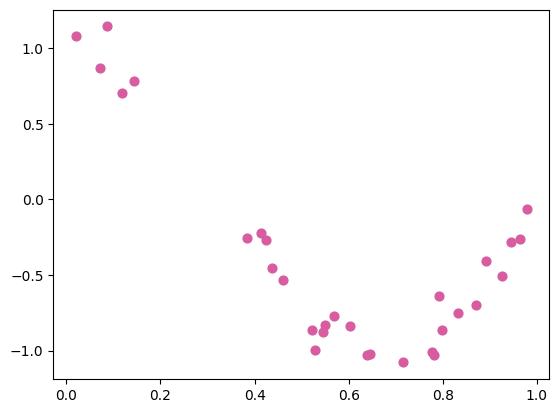

In [107]:
plt.scatter(X, y, s=40, label='data', color='#d75da0')

### Training the polynomial regression model for the following problem with degrees 1, 4, 15.

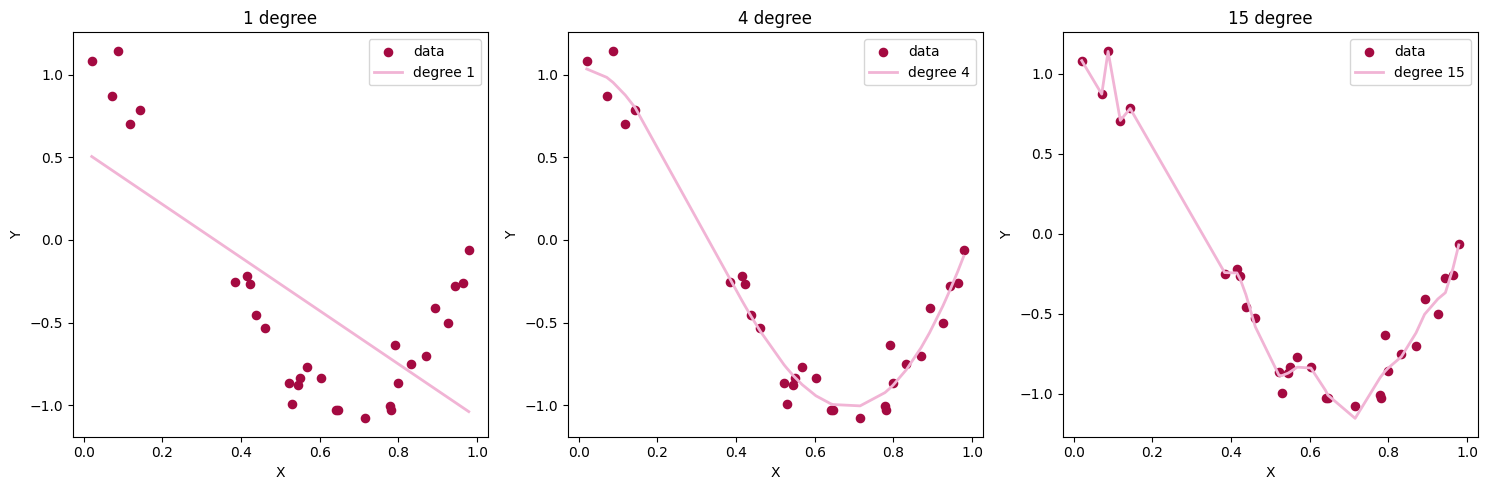

In [108]:
degrees = [1, 4, 15]
models = {}

fig, axes = plt.subplots(nrows=1, ncols=len(degrees), figsize=(15, 5))

for i, d in enumerate(degrees):
    pol = PolynomialFeatures(degree=d)
    X_pol = pol.fit_transform(X.reshape(-1, 1))

    # training
    model = LinearRegression()
    model.fit(X_pol, y)

    # predicting
    y_pred = model.predict(X_pol)
    models[d] = (model, y_pred)

    # visualising
    axes[i].scatter(X, y, s=35, label='data', color='#a40a41')
    axes[i].plot(X, y_pred, label=f'degree {d}', linewidth=2, color='#f1b4d5')
    axes[i].set_title(f'{d} degree')
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Y')
    axes[i].legend()

plt.tight_layout()
plt.show()

As we can see, regression in the 15th degree is overtrained,
that's why we should use regularization.

### Regularization

In [77]:
# transforming into polynomial features
pol = PolynomialFeatures(degree=15)
# reshaping data
X_15 = pol.fit_transform(X.reshape(-1, 1))

In [78]:
alpha = [0.1, 0.01, 0.001]
colors = ['#bd0f5c', '#d75da0', '#f1b4d5']

#### Ridge regularization

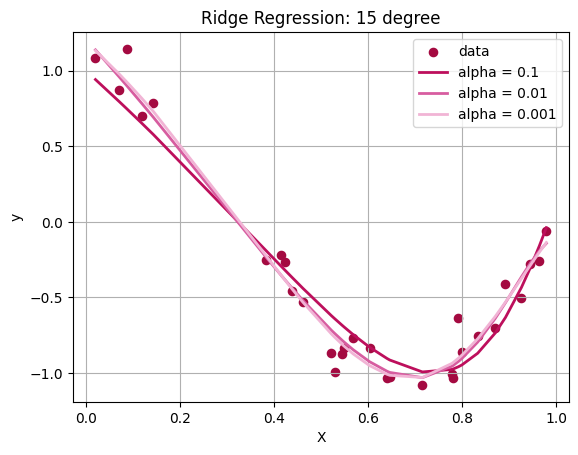

In [79]:
plt.scatter(X, y, s=35, label='data', color='#a40a41')

for c, a in enumerate(alpha):
    # training
    ridge = Ridge(alpha=a)
    ridge.fit(X_15, y)

    # predicting
    y_pred_ridge = ridge.predict(X_15)

    # visualising
    plt.plot(X, y_pred_ridge, label=f'alpha = {a}', color=colors[c], linewidth=2)

plt.title('Ridge Regression: 15 degree')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

#### Lasso regularization

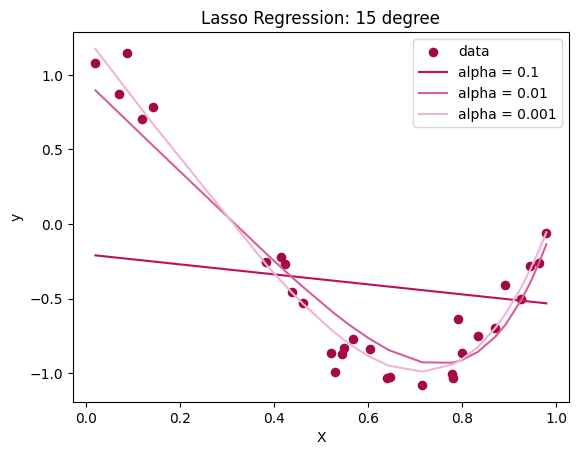

In [80]:
plt.scatter(X, y, s=35, label='data', color='#a40a41')

for c, a in enumerate(alpha):
    # training
    lasso = Lasso(alpha=a)
    lasso.fit(X_15, y)

    # predicting
    y_pred_lasso = lasso.predict(X_15)

    # visualising
    plt.plot(X, y_pred_lasso, label=f'alpha = {a}', color=colors[c])

plt.title('Lasso Regression: 15 degree')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Task 2

Problem 2. For this one, you shall be builduing a small full-cycle ML development pipeline.
You are provided with Boston Housing data, but you may find a dataset of your liking to use in place of the suggested one.

1. Load the Boston Housing dataset +
- Explore the dataset: check its shape, features, and basic statistics +


2. Split the data into features (X) and target variable (y) +
- Perform any necessary scaling or normalization of the features +
- Split the data into training and testing sets +

3. Choose at least two different regression models from scikit-learn (e.g., LinearRegression, RandomForestRegressor, Ridge, Lasso) +
- Train each model on the training data +

4. Make predictions on the test set using each model +
- Calculate and compare the following metrics for each model: +
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)

5. Visualize the predicted vs. actual values for each model +

# California Housing dataset


## Importing data

In [81]:
from sklearn.datasets import fetch_california_housing

In [82]:
c_h = fetch_california_housing()
df = pd.DataFrame(c_h.data, columns=c_h.feature_names)
df['Target'] = c_h.target

In [83]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Exploring the dataset

In [84]:
df.shape

(20640, 9)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


I decided to use YData for visualisation, as you recommended during the lecture.

In [86]:
profile = ProfileReport(df, title="California Housing Dataset Report")

In [88]:
profile
# gotta wait a little bit

Output hidden; open in https://colab.research.google.com to view.

## Split the data into features (X) and target variable (y)

In [89]:
# features
X = df.drop(columns=['Target'])
# target variable
y = df['Target']

In [90]:
X.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [91]:
y.head(5)

,Target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [94]:
print(f'Target mean: {y.mean()}, min: {y.min()}, max: {y.max()}')

Target mean: 2.068558169089147, min: 0.14999, max: 5.00001


### Scaling

In [95]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split the data into training and testing sets

In [96]:
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model training

### Linear Regression

In [97]:
# training
reg = LinearRegression()
reg.fit (X_train, y_train)
# predicting
y_pred = reg.predict(X_test)

### Ridge

In [98]:
# training
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
# predicting
y_pred_rg = ridge.predict(X_test)

## Results

In [99]:
l_score = round(reg.score(X_test, y_test), 5)
r_score = round(ridge.score(X_test, y_test), 5)
l_mse = round(mean_squared_error(y_test , y_pred), 5)
r_mse = round(mean_squared_error(y_test , y_pred_rg), 5)
l_rmse = round(np.sqrt(mean_squared_error(y_test , y_pred)), 5)
r_rmse = round(np.sqrt(mean_squared_error(y_test , y_pred_rg)), 5)

print('Linear Regression/Ridge results')
print('---------------------')

print(f'Model Score: {l_score} / {r_score}')
print('---------------------')
print(f'Mean Squared Error: {l_mse} / {r_mse}')
print('---------------------')
print(f'Root Mean Squared Error: {l_rmse} / {r_rmse}')


Linear Regression/Ridge results
---------------------
Model Score: 0.57579 / 0.57582
---------------------
Mean Squared Error: 0.55589 / 0.55585
---------------------
Root Mean Squared Error: 0.74558 / 0.74555


In [100]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Ridge Predicted': y_pred_rg,
    'Lin. Reg. Predicted': y_pred
})

### Visualising results

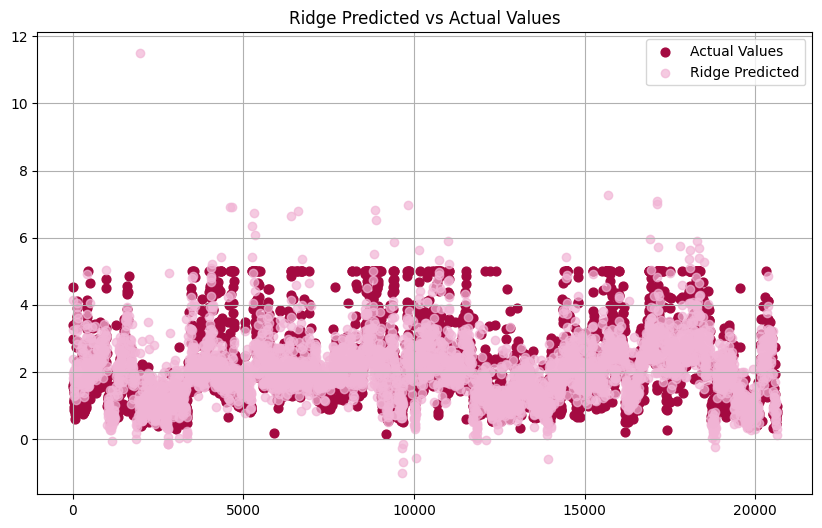

In [101]:
plt.figure(figsize=(10, 6))

# actual values
plt.scatter(results_df.index, results_df['Actual'], color='#a40a41', label='Actual Values', s=40)
# ridge predicted
plt.scatter(results_df.index, results_df['Ridge Predicted'], color='#f1b4d5', label='Ridge Predicted', alpha=0.7)

plt.title('Ridge Predicted vs Actual Values')
# plt.xlabel('Index')
# plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

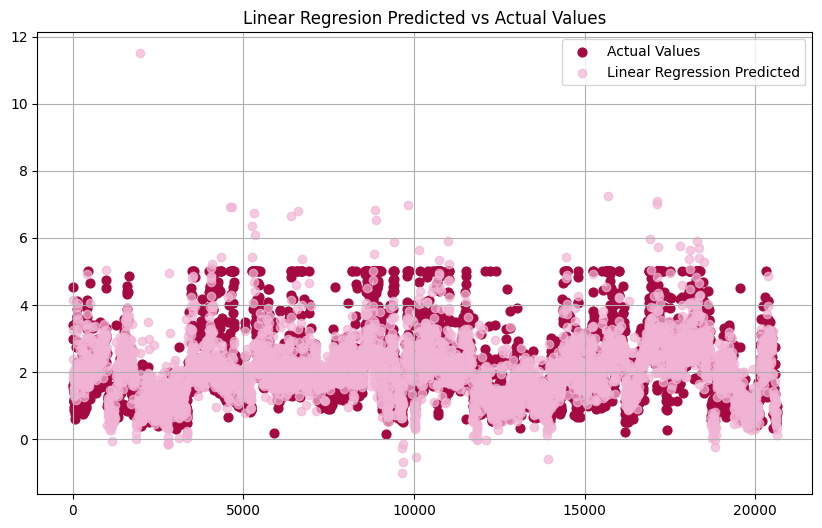

In [102]:
plt.figure(figsize=(10, 6))

# actual values
plt.scatter(results_df.index, results_df['Actual'], color='#a40a41', label='Actual Values', s=40)
# linear regression predicted
plt.scatter(results_df.index, results_df['Lin. Reg. Predicted'], color='#f1b4d5', label='Linear Regression Predicted', alpha=0.7)

plt.title('Linear Regresion Predicted vs Actual Values')
# plt.xlabel('Index')
# plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

I also decided to compare both models to see if there any valuable difference between them.

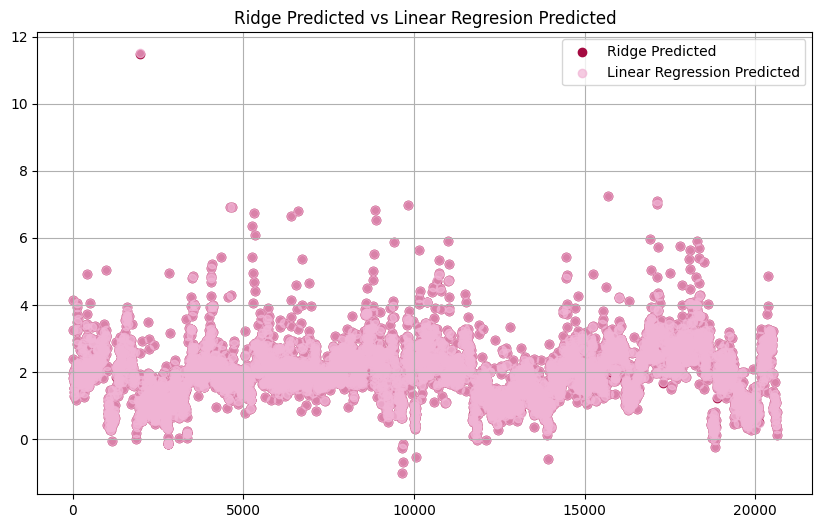

In [103]:
plt.figure(figsize=(10, 6))

# ridge predicted
plt.scatter(results_df.index, results_df['Ridge Predicted'], color='#a40a41', label='Ridge Predicted', alpha=1.0)
# linear regression predicted
plt.scatter(results_df.index, results_df['Lin. Reg. Predicted'], color='#f1b4d5', label='Linear Regression Predicted', alpha=0.7)

plt.title('Ridge Predicted vs Linear Regresion Predicted')
# plt.xlabel('Index')
# plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

As we can see there's almost no difference between these two models. I think it's because of small size of the dataset probably.

Thanks for attention!